In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import hvplot.pandas
from pathlib import Path
import yfinance as yf


In [2]:
## CHIPOTLE DATA

cmg = yf.Ticker("CMG")

cmg_historical = cmg.history(start="2018-1-5", end="2021-1-5", interval="1d")
cmg_df = cmg_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])

In [3]:
cmg_df.rename(columns= {'Close':'CMG'}, inplace=True)
cmg_daily = cmg_df.pct_change()

In [4]:
## SHOPIFY DATA

shop = yf.Ticker("shop")

shop_historical = shop.history(start="2018-1-5", end="2021-1-5", interval="1d")
shop_df = shop_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])

In [5]:
shop_df.rename(columns= {'Close':'SHOP'}, inplace=True)
shop_daily = shop_df.pct_change()

In [6]:
## TSLA DATA

tsla= yf.Ticker("tsla")

tsla_historical = tsla.history(start="2018-1-5", end="2021-1-5", interval="1d")
tsla_df = tsla_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])

In [7]:
tsla_df.rename(columns= {'Close':'TSLA'}, inplace=True)
tsla_daily = tsla_df.pct_change()

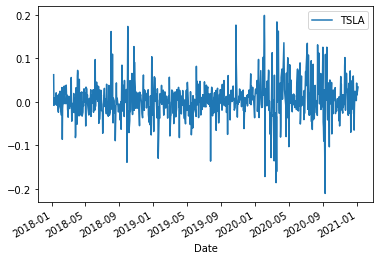

In [8]:
tsla_daily.plot()

In [9]:
## PALO ALTO DATA

panw = yf.Ticker("panw")

panw_historical = panw.history(start="2018-1-5", end="2021-1-5", interval="1d")
panw_df = tsla_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])

In [10]:
panw_df.rename(columns= {'Close':'PANW'}, inplace=True)
panw_daily = panw_df.pct_change()

In [11]:
## AMAZON DATA

amzn = yf.Ticker("amzn")

amzn_historical = amzn.history(start="2018-1-5", end="2021-1-5", interval="1d")
amzn_df = amzn_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])

In [12]:
amzn_df.rename(columns= {'Close':'AMZN'}, inplace=True)
amzn_daily = amzn_df.pct_change()

In [13]:
## FACEBOOK DATA

fb = yf.Ticker("fb")

fb_historical = fb.history(start="2018-1-5", end="2021-1-5", interval="1d")
fb_df = fb_historical.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', 'Volume'])

In [14]:
fb_df.rename(columns= {'Close':'FB'}, inplace=True)
fb_daily = fb_df.pct_change()

In [15]:
# Concat join tickers into one DataFrame

portfolio_df = pd.concat([fb_daily, amzn_daily, tsla_daily, panw_daily, shop_daily, cmg_daily], axis="columns", join="inner")
daily_portfolio = portfolio_df

In [16]:
daily_portfolio.dropna()

,FB,AMZN,TSLA,PANW,SHOP,CMG
Date,,,,,,
2018-01-08,0.007653,0.014425,0.062539,0.062539,0.016007,0.014914
2018-01-09,-0.002178,0.004676,-0.008026,-0.008026,-0.014419,0.002826
2018-01-10,-0.000160,0.001301,0.003296,0.003296,0.002438,0.007609
2018-01-11,-0.000373,0.017818,0.009409,0.009409,0.001171,0.011498
2018-01-12,-0.044736,0.022339,-0.005178,-0.005178,0.015027,0.005653
...,...,...,...,...,...,...
2020-12-28,0.035901,0.035071,0.002901,0.002901,-0.064022,-0.007830
2020-12-29,-0.000794,0.011584,0.003465,0.003465,0.021403,-0.006622
2020-12-30,-0.017740,-0.010882,0.043229,0.043229,-0.007349,-0.012958


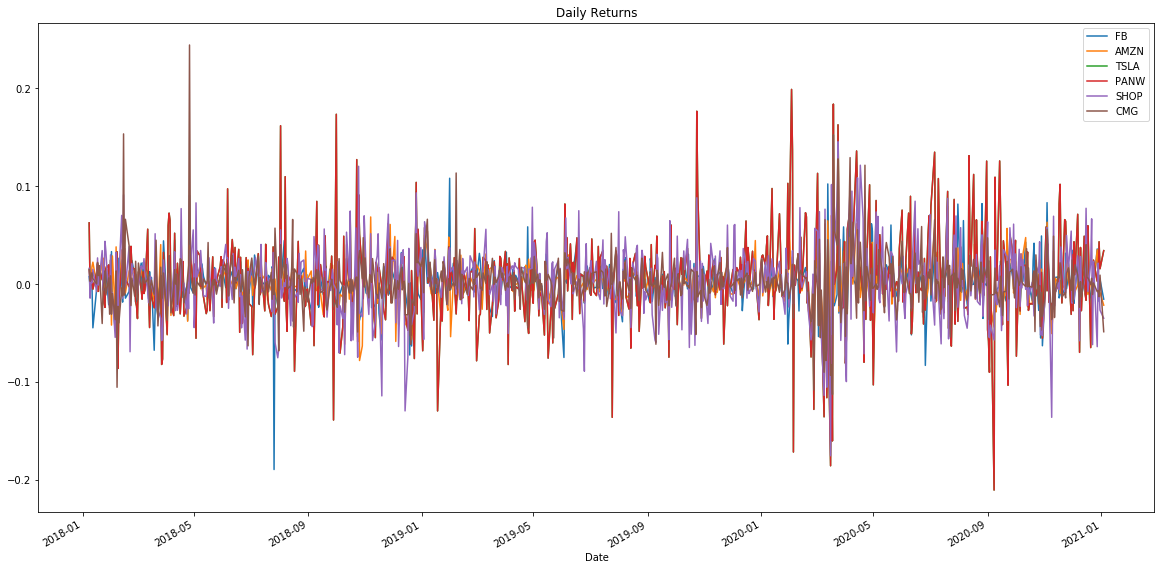

In [17]:
import mplcyberpunk
from matplotlib import style
# style.use('cyberpunk')

daily_portfolio.plot(figsize=(20, 10), title="Daily Returns")

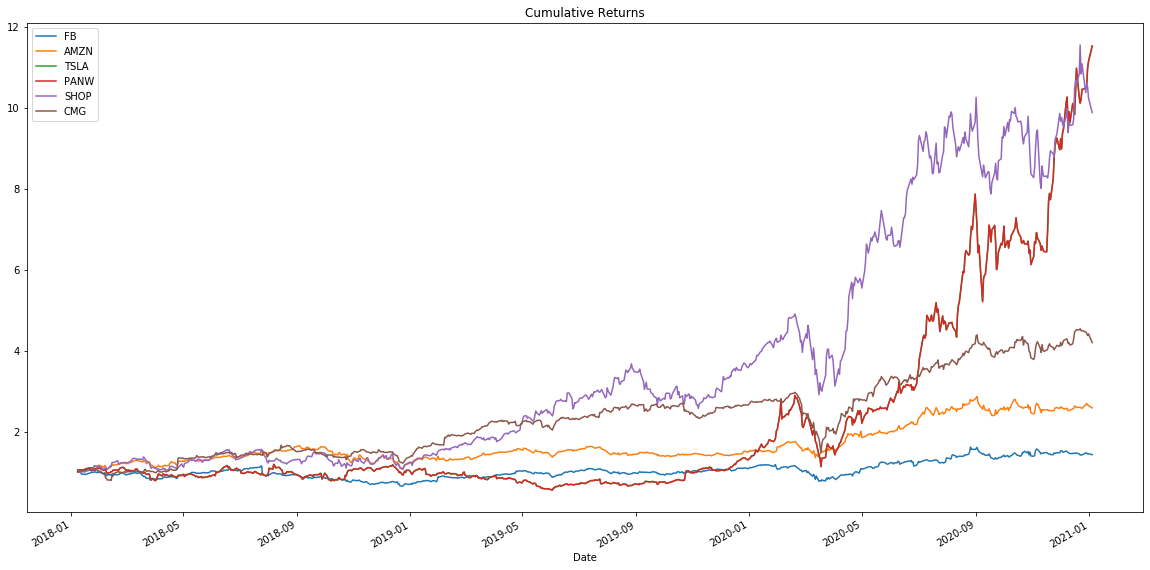

In [19]:
cumulative_returns = (1 + daily_portfolio).cumprod()
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns")

In [20]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
daily_portfolio.std()

FB      0.023967
AMZN    0.020956
TSLA    0.043043
PANW    0.043043
SHOP    0.035142
CMG     0.026069
dtype: float64

In [21]:
# Calculate the annualized standard deviation (252 trading days)
daily_portfolio.std() * np.sqrt(252)

FB      0.380461
AMZN    0.332667
TSLA    0.683293
PANW    0.683293
SHOP    0.557858
CMG     0.413833
dtype: float64

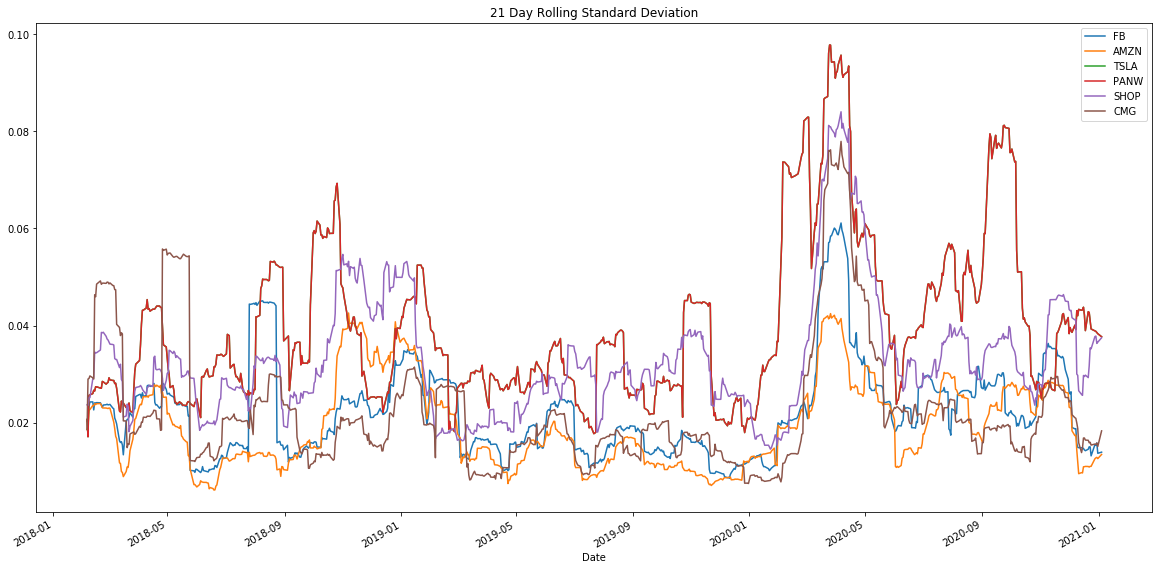

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
daily_portfolio.rolling(window=21).std().plot(figsize=(20, 10), title="21 Day Rolling Standard Deviation")

In [21]:
# Construct a correlation table
corr_df = daily_portfolio.corr()
corr_df.style.background_gradient(cmap="summer")

,FB,AMZN,TSLA,PANW,SHOP,CMG
FB,1.000000,0.632288,0.332114,0.332114,0.471451,0.441256
AMZN,0.632288,1.000000,0.391006,0.391006,0.584107,0.388243
TSLA,0.332114,0.391006,1.000000,1.000000,0.378446,0.327770
PANW,0.332114,0.391006,1.000000,1.000000,0.378446,0.327770
SHOP,0.471451,0.584107,0.378446,0.378446,1.000000,0.405079
CMG,0.441256,0.388243,0.327770,0.327770,0.405079,1.000000


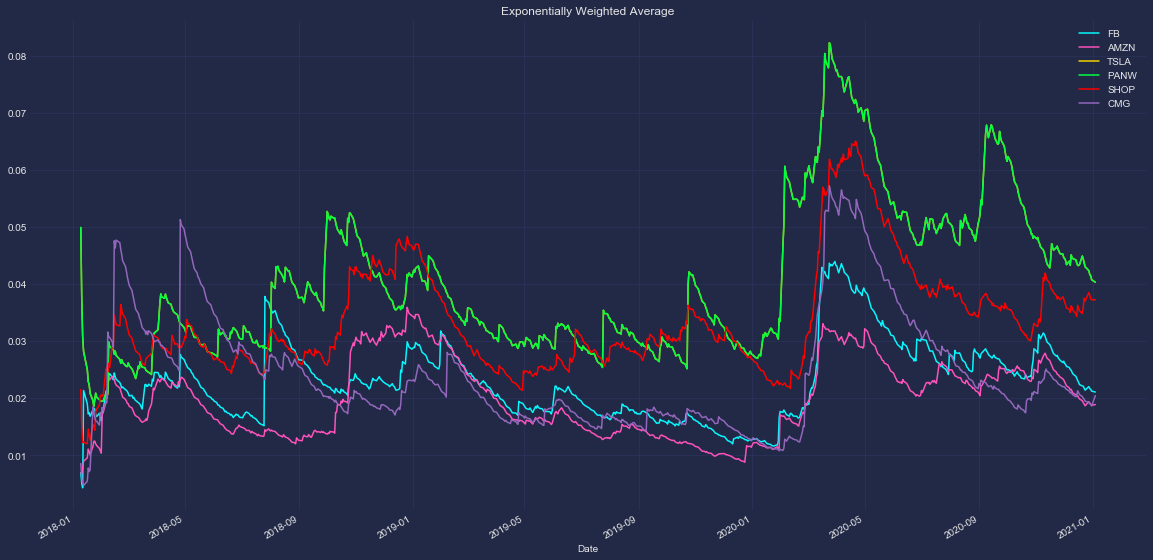

In [22]:
# Calculate a rolling window using the exponentially weighted moving average. 
daily_portfolio.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

In [23]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (daily_portfolio.mean() * 252) / (daily_portfolio.std() * np.sqrt(252))
sharpe_ratios

FB      0.512954
AMZN    1.124956
TSLA    1.539425
PANW    1.539425
SHOP    1.655751
CMG     1.364186
dtype: float64

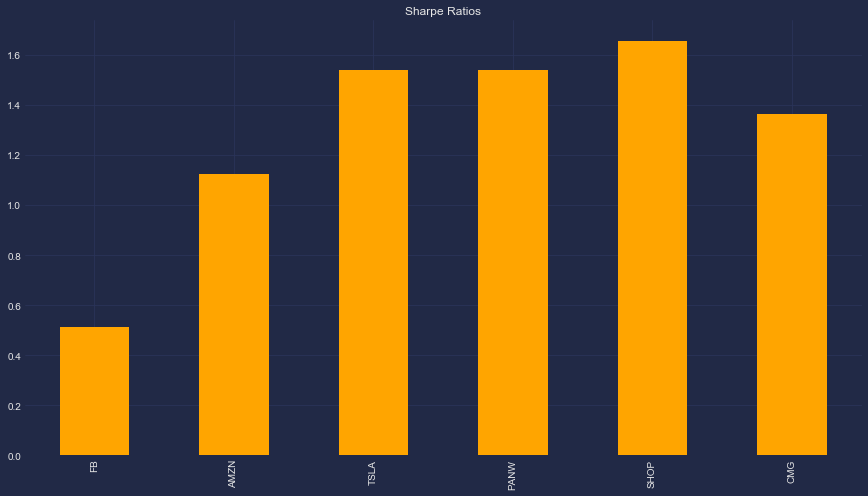

In [24]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize=(15, 8),kind="bar", title="Sharpe Ratios", color= 'orange')

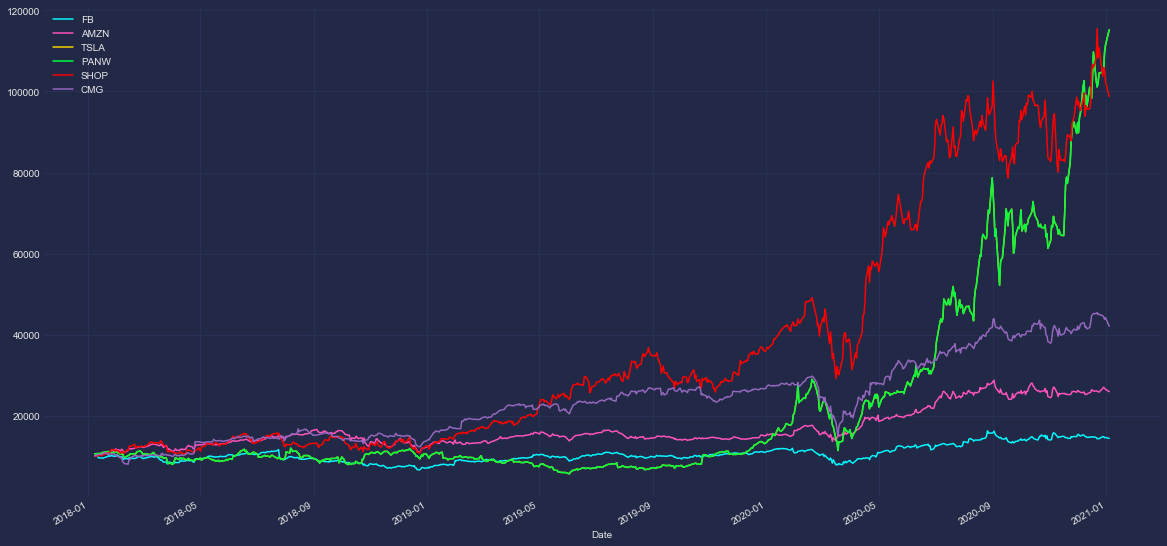

In [25]:
# Plot the returns of the portfolio in terms of money
initial_investment = 10000
cumulative_profit = initial_investment * cumulative_returns
cumulative_profit.plot(figsize=(20, 10))

In [26]:
# Prepare DataFrame for metrics
metrics = [
    'FB Annual Return', 'AMZN Annual Return', 'TSLA Annual Return','PANW Annual Return','SHOP Annual Return', 'CMG Annual Return',
    'FB Annual Volatility','AMZN Annual Volatility','TSLA Annual Volatility','PANW Annual Volatility','SHOP Annual Volatility','CMG Annual Volatility',
    'FB Sharpe Ratio','AMZN Sharpe Ratio','TSLA Sharpe Ratio','PANW Sharpe Ratio','SHOP Sharpe Ratio','CMG Sharpe Ratio']

columns = ['Backtest']

# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df

,Backtest
FB Annual Return,NaN
AMZN Annual Return,NaN
TSLA Annual Return,NaN
PANW Annual Return,NaN
SHOP Annual Return,NaN
CMG Annual Return,NaN
FB Annual Volatility,NaN
AMZN Annual Volatility,NaN
TSLA Annual Volatility,NaN
PANW Annual Volatility,NaN


In [31]:
# Calculate annualized return
portfolio_evaluation_df.loc['FB Annual Return'] = daily_portfolio['FB'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['AMZN Annual Return'] = daily_portfolio['AMZN'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['TSLA Annual Return'] = daily_portfolio['TSLA'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['PANW Annual Return'] = daily_portfolio['PANW'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['SHOP Annual Return'] = daily_portfolio['SHOP'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['CMG Annual Return'] = daily_portfolio['CMG'].std() * np.sqrt(252)

# Calculate annual volatility
portfolio_evaluation_df.loc['FB Annual Volatility'] = daily_portfolio['FB'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['AMZN Annual Volatility'] = daily_portfolio['AMZN'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['TSLA Annual Volatility'] = daily_portfolio['TSLA'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['PANW Annual Volatility'] = daily_portfolio['PANW'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['SHOP Annual Volatility'] = daily_portfolio['SHOP'].std() * np.sqrt(252)
portfolio_evaluation_df.loc['CMG Annual Volatility'] = daily_portfolio['CMG'].std() * np.sqrt(252)

# Calculate Sharpe Ratio
portfolio_evaluation_df.loc['FB Sharpe Ratio'] = sharpe_ratios['FB']
portfolio_evaluation_df.loc['AMZN Sharpe Ratio'] = sharpe_ratios['AMZN']
portfolio_evaluation_df.loc['TSLA Sharpe Ratio'] = sharpe_ratios['TSLA']
portfolio_evaluation_df.loc['PANW Sharpe Ratio'] = sharpe_ratios['PANW']
portfolio_evaluation_df.loc['SHOP Sharpe Ratio'] = sharpe_ratios['SHOP']
portfolio_evaluation_df.loc['CMG Sharpe Ratio'] = sharpe_ratios['CMG']


portfolio_evaluation_df.head(18)

,index,Backtest
0,FB Annual Return,0.380461
1,AMZN Annual Return,0.332667
2,TSLA Annual Return,0.683293
3,PANW Annual Return,0.683293
4,SHOP Annual Return,0.557858
5,CMG Annual Return,0.413833
6,FB Annual Volatility,0.380461
7,AMZN Annual Volatility,0.332667
8,TSLA Annual Volatility,0.683293
9,PANW Annual Volatility,0.683293


In [28]:
portfolio_evaluation_df.reset_index(inplace=True)
portfolio_evaluation_table = portfolio_evaluation_df.hvplot.table()
portfolio_evaluation_table

:Table   [index,Backtest]

In [29]:
# import plotly.graph_objects as go

# years = [1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
#          2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012]

# fig = go.Figure()
# fig.add_trace(go.Bar(x=years,
#                 y=[219, 146, 112, 127, 124, 180, 236, 207, 236, 263,
#                    350, 430, 474, 526, 488, 537, 500, 439],
#                 name='Rest of world',
#                 marker_color='rgb(55, 83, 109)'
#                 ))
# fig.add_trace(go.Bar(x=years,
#                 y=[16, 13, 10, 11, 28, 37, 43, 55, 56, 88, 105, 156, 270,
#                    299, 340, 403, 549, 499],
#                 name='China',
#                 marker_color='rgb(26, 118, 255)'
#                 ))

# fig.update_layout(
#     title='US Export of Plastic Scrap',
#     xaxis_tickfont_size=14,
#     yaxis=dict(
#         title='USD (millions)',
#         titlefont_size=16,
#         tickfont_size=14,
#     ),
#     legend=dict(
#         x=0,
#         y=1.0,
#         bgcolor='rgba(255, 255, 255, 0)',
#         bordercolor='rgba(255, 255, 255, 0)'
#     ),
#     barmode='group',
#     bargap=0.15, # gap between bars of adjacent location coordinates.
#     bargroupgap=0.1 # gap between bars of the same location coordinate.
# )
# fig.show()